In [1]:
import sys
print(sys.executable)
print(sys.version)


/Users/keithheng/opt/anaconda3/bin/python
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


In [ ]:
import os
import json
import datetime
import math
import openai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables from a .env file (if present)
load_dotenv()

# Retrieve OpenAI API key from environment variables
openai.api_key = os.getenv('OPENAI_API_KEY')

# Ensure the API key is loaded correctly
if openai.api_key is None:
    raise ValueError("OpenAI API key not found. Please set 'OPENAI_API_KEY' in your environment variables.")

In [3]:
import sys
print(sys.executable)
print(sys.version)


/Users/keithheng/opt/anaconda3/bin/python
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


# Exploring other AIMD Configurations

## Conventional AIMD

Convergence reached in 103 iterations
Final x1: 24.97, Average Sending Rate per RTT: 18.06
Final x2: 25.03, Average Sending Rate per RTT: 19.40


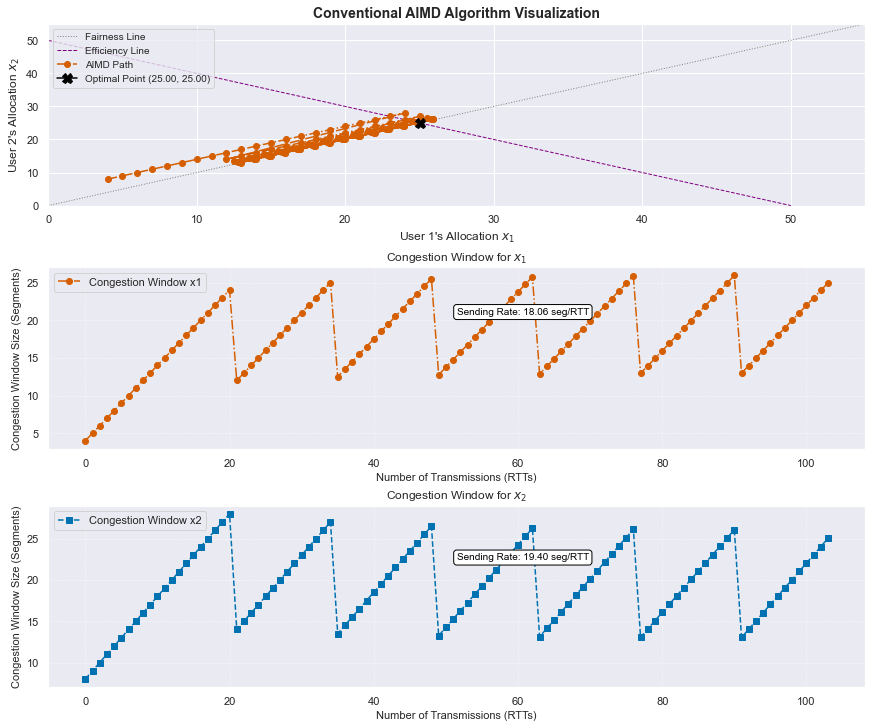

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def aimd_convergence_plot(C, x1, x2, alpha1, alpha2, beta1, beta2, output: str = 'output.svg', title: str = 'AIMD Convergence Algorithm'):
    """
    Visualizes the AIMD (Additive Increase Multiplicative Decrease) process.

    Parameters:
    - C: Total network capacity
    - x1, x2: Initial congestion window sizes for users 1 and 2
    - alpha1, alpha2: Additive increase factors
    - beta1, beta2: Multiplicative decrease factors
    - output: Filename to save the plot
    - title: Title of the plot
    """

    # Set up Seaborn visualization theme
    sns.set_theme(style="darkgrid")

    # Lists to store congestion window values over time
    x1_values, x2_values = [x1], [x2]

    # Compute the theoretical optimal allocation point (fair share)
    optimal_x, optimal_y = C / 2, C / 2

    # Track the number of iterations (RTTs)
    iterations = 0

    # Iterate until convergence or max iterations
    while iterations < 1000:
        # Stop if values converge close to the optimal point
        if round(x1, 1) == round(optimal_x, 2) and round(x2, 1) == round(optimal_y, 2):
            break

        # Apply AIMD logic: Additive Increase when within capacity, Multiplicative Decrease when congested
        if (x1 + x2) <= C:
            x1 += alpha1
            x2 += alpha2
        else:
            x1 *= (1 - beta1)
            x2 *= (1 - beta2)

        # Store values for plotting
        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

    # Convert lists to NumPy arrays for easier plotting
    x1_values, x2_values = np.array(x1_values), np.array(x2_values)
    rtt_values = np.arange(iterations + 1)

    # Calculate average congestion window size over RTTs
    sending_rate_x1 = np.mean(x1_values)
    sending_rate_x2 = np.mean(x2_values)

    # Print summary statistics
    print(f'Convergence reached in {iterations} iterations')
    print(f'Final x1: {x1:.2f}, Average Sending Rate per RTT: {sending_rate_x1:.2f}')
    print(f'Final x2: {x2:.2f}, Average Sending Rate per RTT: {sending_rate_x2:.2f}')

    # Set up figure with 3 vertically stacked subplots
    fig = plt.figure(figsize=(12, 10), layout="constrained")

    # Define subplots for AIMD trajectory and congestion window evolution
    main_plot = plt.subplot2grid((3, 1), (0, 0), rowspan=1)
    congestion_x1 = plt.subplot2grid((3, 1), (1, 0), rowspan=1)
    congestion_x2 = plt.subplot2grid((3, 1), (2, 0), rowspan=1)

    # Define colors and styles for visualization
    colors = ['#D55E00', '#0072B2']
    markers = ['o', 's']
    line_styles = ['-.', '--']

    ## Plot AIMD Path (x1 vs x2)
    fairness_x = np.linspace(0, C * 1.1, C)
    main_plot.plot(fairness_x, fairness_x, linestyle='dotted', linewidth=1, color='gray', label='Fairness Line')

    efficiency_x = np.linspace(0, C, C)
    efficiency_y = C - efficiency_x
    main_plot.plot(efficiency_x, efficiency_y, linestyle='dashed', linewidth=1, color='purple', label='Efficiency Line')

    main_plot.plot(x1_values, x2_values, linestyle=line_styles[0], marker=markers[0], color=colors[0], label='AIMD Path')
    main_plot.plot(optimal_x, optimal_y, marker='X', color='black', markersize=10, label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Label axes and set title
    main_plot.set_xlabel("User 1's Allocation $x_{1}$", fontsize=12)
    main_plot.set_ylabel("User 2's Allocation $x_{2}$", fontsize=12)
    main_plot.set_xlim(0, C * 1.1)
    main_plot.set_ylim(0, C * 1.1)
    main_plot.legend(loc='upper left', fontsize=10)
    main_plot.set_title(title, fontsize=14, fontweight='bold')

    ## Plot Congestion Window Evolution for x1
    congestion_x1.plot(rtt_values, x1_values, linestyle=line_styles[0], marker=markers[0], color=colors[0], label='Congestion Window x1')
    congestion_x1.annotate(
        f'Sending Rate: {sending_rate_x1:.2f} seg/RTT',
        xy=(iterations / 2, np.max(x1_values) * 0.8),
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    congestion_x1.set_xlabel('Number of Transmissions (RTTs)', fontsize=11)
    congestion_x1.set_ylabel('Congestion Window Size (Segments)', fontsize=11)
    congestion_x1.set_title('Congestion Window for $x_{1}$', fontsize=12)
    congestion_x1.legend()
    congestion_x1.grid(True, linestyle='dotted', linewidth=0.7)

    ## Plot Congestion Window Evolution for x2
    congestion_x2.plot(rtt_values, x2_values, linestyle=line_styles[1], marker=markers[1], color=colors[1], label='Congestion Window x2')
    congestion_x2.annotate(
        f'Sending Rate: {sending_rate_x2:.2f} seg/RTT',
        xy=(iterations / 2, np.max(x2_values) * 0.8),
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    congestion_x2.set_xlabel('Number of Transmissions (RTTs)', fontsize=11)
    congestion_x2.set_ylabel('Congestion Window Size (Segments)', fontsize=11)
    congestion_x2.set_title('Congestion Window for $x_{2}$', fontsize=12)
    congestion_x2.legend()
    congestion_x2.grid(True, linestyle='dotted', linewidth=0.7)

    # Save the figure and display the plots
    plt.savefig(output)
    plt.show()

# Run AIMD visualization with modified plot styles
aimd_convergence_plot(
    C=50,        # Total network capacity
    x1=4,        # Initial congestion window for user 1
    x2=8,        # Initial congestion window for user 2
    alpha1=1,    # Additive increase for user 1
    alpha2=1,    # Additive increase for user 2
    beta1=0.5,   # Multiplicative decrease for user 1
    beta2=0.5,   # Multiplicative decrease for user 2
    output="AIMD_Styled.svg",
    title="Conventional AIMD Algorithm Visualization"
)


## Adaptive Additive Increase Multiplicative Decrease (AAIMD)

Number of iterations to converge: 70
Final x1: 24.95, Sending Rate per RTT: 19.87
Final x2: 24.96, Sending Rate per RTT: 22.32


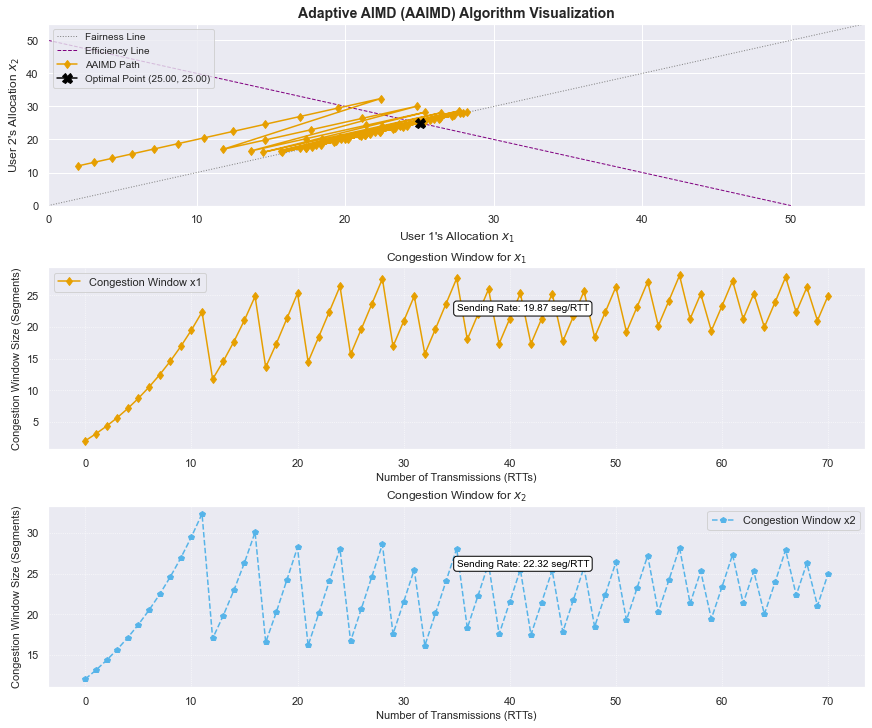

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def aaimd_convergence_plot(C, x1, x2, alpha1, alpha2, beta1, beta2, output: str = 'AAIMD_Output.svg', title: str = 'Adaptive AIMD Algorithm'):
    """
    Visualizes the Adaptive AIMD (AAIMD) process with dynamic alpha and beta adjustments.

    Parameters:
    - C: Total network capacity
    - x1, x2: Initial congestion window sizes for users 1 and 2
    - alpha1, alpha2: Additive increase factors (adaptive)
    - beta1, beta2: Multiplicative decrease factors (adaptive)
    - output: Filename to save the plot
    - title: Title of the plot
    """

    # Set visualization style
    sns.set_theme(style="darkgrid")

    # Store congestion window values for plotting
    x1_values, x2_values = [x1], [x2]

    # Compute optimal fair share point
    optimal_x, optimal_y = C / 2, C / 2

    # Maximum and minimum limits for alpha and beta adjustments
    alpha_max = 4      # Upper bound for α (max additive increase)
    beta_min = 0.2     # Lower bound for β (min multiplicative decrease)

    # Track number of iterations (RTTs)
    iterations = 0

    # Iterate until convergence or max iterations
    while iterations < 1000:
        # Stop if both values converge near the optimal allocation
        if round(x1, 1) == round(optimal_x, 2) and round(x2, 1) == round(optimal_y, 2):
            break

        # Adaptive Additive Increase: Increase α if capacity allows, otherwise decrease
        if (x1 + x2) <= C:
            alpha1 = min(alpha1 * 1.1, alpha_max)  # Gradually increase α
            alpha2 = min(alpha2 * 1.1, alpha_max)
        else:
            alpha1 = max(alpha1 * 0.9, 0.1)  # Reduce α to prevent overshooting
            alpha2 = max(alpha2 * 0.9, 0.1)

        # Apply AIMD logic: Additive Increase when within capacity, Multiplicative Decrease when congested
        if (x1 + x2) <= C:
            x1 += alpha1
            x2 += alpha2
        else:
            # Adaptive Multiplicative Decrease: Reduce β over time for smoother reduction
            beta1 = max(beta1 * 0.95, beta_min)
            beta2 = max(beta2 * 0.95, beta_min)

            x1 *= (1 - beta1)
            x2 *= (1 - beta2)

        # Store values for plotting
        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

    # Convert lists to NumPy arrays for easier plotting
    x1_values, x2_values = np.array(x1_values), np.array(x2_values)
    rtt_values = np.arange(iterations + 1)

    # Compute average congestion window size over RTTs
    sending_rate_x1 = np.mean(x1_values)
    sending_rate_x2 = np.mean(x2_values)

    # Print summary statistics
    print(f'Convergence reached in {iterations} iterations')
    print(f'Final x1: {x1:.2f}, Average Sending Rate per RTT: {sending_rate_x1:.2f}')
    print(f'Final x2: {x2:.2f}, Average Sending Rate per RTT: {sending_rate_x2:.2f}')

    # Set up figure with 3 vertically stacked subplots
    fig = plt.figure(figsize=(12, 10), layout="constrained")

    # Define subplots for AAIMD trajectory and congestion window evolution
    main_plot = plt.subplot2grid((3, 1), (0, 0), rowspan=1)
    congestion_x1 = plt.subplot2grid((3, 1), (1, 0), rowspan=1)
    congestion_x2 = plt.subplot2grid((3, 1), (2, 0), rowspan=1)

    # Define colors and styles for visualization
    colors = ['#E69F00', '#56B4E9']
    markers = ['d', 'p']
    line_styles = ['-', '--']

    ## Plot AAIMD Path (x1 vs x2)
    fairness_x = np.linspace(0, C * 1.1, C)
    main_plot.plot(fairness_x, fairness_x, linestyle='dotted', linewidth=1, color='gray', label='Fairness Line')

    efficiency_x = np.linspace(0, C, C)
    efficiency_y = C - efficiency_x
    main_plot.plot(efficiency_x, efficiency_y, linestyle='dashed', linewidth=1, color='purple', label='Efficiency Line')

    main_plot.plot(x1_values, x2_values, linestyle=line_styles[0], marker=markers[0], color=colors[0], label='AAIMD Path')
    main_plot.plot(optimal_x, optimal_y, marker='X', color='black', markersize=10, label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Label axes and set title
    main_plot.set_xlabel("User 1's Allocation $x_{1}$", fontsize=12)
    main_plot.set_ylabel("User 2's Allocation $x_{2}$", fontsize=12)
    main_plot.set_xlim(0, C * 1.1)
    main_plot.set_ylim(0, C * 1.1)
    main_plot.legend(loc='upper left', fontsize=10)
    main_plot.set_title(title, fontsize=14, fontweight='bold')

    ## Plot Congestion Window Evolution for x1
    congestion_x1.plot(rtt_values, x1_values, linestyle=line_styles[0], marker=markers[0], color=colors[0], label='Congestion Window x1')
    congestion_x1.annotate(
        f'Sending Rate: {sending_rate_x1:.2f} seg/RTT',
        xy=(iterations / 2, np.max(x1_values) * 0.8),
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    congestion_x1.set_xlabel('Number of Transmissions (RTTs)', fontsize=11)
    congestion_x1.set_ylabel('Congestion Window Size (Segments)', fontsize=11)
    congestion_x1.set_title('Congestion Window for $x_{1}$', fontsize=12)
    congestion_x1.legend()
    congestion_x1.grid(True, linestyle='dotted', linewidth=0.7)

    ## Plot Congestion Window Evolution for x2
    congestion_x2.plot(rtt_values, x2_values, linestyle=line_styles[1], marker=markers[1], color=colors[1], label='Congestion Window x2')
    congestion_x2.annotate(
        f'Sending Rate: {sending_rate_x2:.2f} seg/RTT',
        xy=(iterations / 2, np.max(x2_values) * 0.8),
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    congestion_x2.set_xlabel('Number of Transmissions (RTTs)', fontsize=11)
    congestion_x2.set_ylabel('Congestion Window Size (Segments)', fontsize=11)
    congestion_x2.set_title('Congestion Window for $x_{2}$', fontsize=12)
    congestion_x2.legend()
    congestion_x2.grid(True, linestyle='dotted', linewidth=0.7)

    # Save the figure and display the plots
    plt.savefig(output)
    plt.show()

# Run AAIMD visualization with adaptive α and β adjustments
aaimd_convergence_plot(
    C=50,        # Total network capacity
    x1=2,        # Initial congestion window for user 1
    x2=12,       # Initial congestion window for user 2
    alpha1=1,    # Initial additive increase for user 1
    alpha2=1,    # Initial additive increase for user 2
    beta1=0.5,   # Initial multiplicative decrease for user 1
    beta2=0.5,   # Initial multiplicative decrease for user 2
    output="AAIMD_Styled.svg",
    title="Adaptive AIMD (AAIMD) Algorithm Visualization"
)


## Adaptive Fairness Hybrid Increase Sigmoidal Decrease (AFHISD)

Number of iterations to converge: 383
Final x1: 24.95
Final x2: 25.05


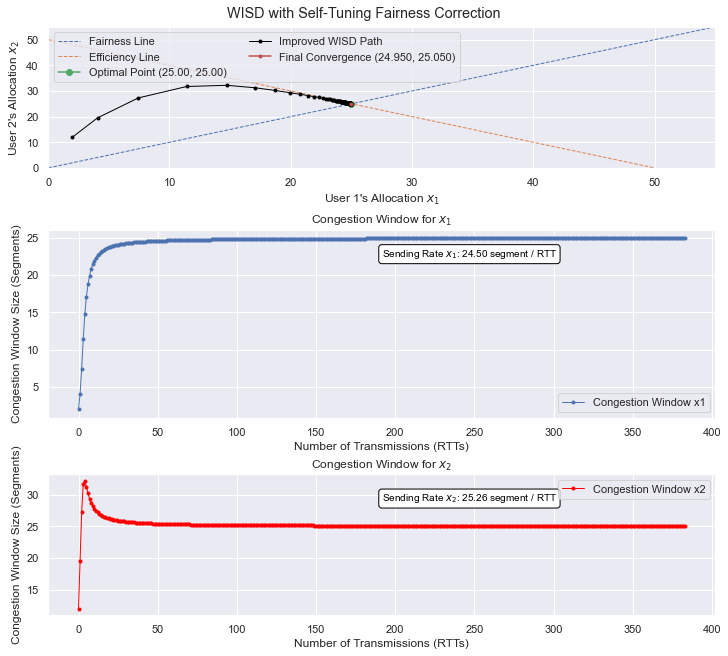

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def afhisd_convergence_plot(C, x1, x2, kappa, lambda_max, gamma, output="AFHISD_Dynamic_Fairness.svg", title="AFHISD: Adaptive Fairness Hybrid Increase Sigmoidal Decrease"):
    """
    Simulates and visualizes the AFHISD (Adaptive Fairness Hybrid Increase Sigmoidal Decrease) process.

    Parameters:
    - C (int): Maximum network capacity.
    - x1, x2 (float): Initial congestion window allocations for users 1 and 2.
    - kappa (float): Controls the rate of sigmoidal decrease (higher values react faster).
    - lambda_max (float): Maximum fairness correction factor.
    - gamma (float): Sensitivity parameter for fairness adaptation.
    - output (str): Filename for saving the plot.
    - title (str): Title for the visualization.
    """

    # Set visualization theme
    sns.set_theme(style="darkgrid")

    # Store congestion window sizes for plotting
    x1_values, x2_values = [x1], [x2]

    # Compute ideal fair allocation (equal share of capacity)
    optimal_x, optimal_y = C / 2, C / 2

    # Track iterations for convergence
    iterations = 0

    # Run simulation for at most 1000 RTTs or until convergence
    while iterations < 1000:
        # Stop if values are close to the optimal allocation
        if round(x1, 1) == round(optimal_x, 2) and round(x2, 1) == round(optimal_y, 2):
            break

        # Compute dynamic fairness correction factor (λ)
        fairness_lambda = lambda_max * (1 - np.exp(-gamma * abs(x2 - x1)))

        # Apply Hybrid Increase when within capacity
        if (x1 + x2) <= C:
            fairness_correction = fairness_lambda * (x2 - x1)  # Ensures fair resource distribution
            x1 += ((C - (x1 + x2)) / C) * x1 + fairness_correction
            x2 += ((C - (x1 + x2)) / C) * x2 - fairness_correction
        else:
            # Apply Sigmoidal Decrease when exceeding capacity
            beta = 1 / (1 + np.exp(-kappa * (x1 + x2 - C)))

            # Adjust decrease based on current allocation ratio
            total_allocation = x1 + x2
            weight_x1 = x1 / total_allocation
            weight_x2 = x2 / total_allocation

            # Apply fairness-aware penalty during decrease
            x1 *= (1 - beta * (1 + 0.05 * weight_x1))
            x2 *= (1 - beta * (1 + 0.05 * weight_x2))

        # Store values for visualization
        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

    # Convert lists to NumPy arrays for plotting
    x1_values, x2_values = np.array(x1_values), np.array(x2_values)
    rtt_values = np.arange(iterations + 1)

    # Compute average sending rate per RTT
    sending_rate_x1 = np.mean(x1_values)
    sending_rate_x2 = np.mean(x2_values)

    # Print summary statistics
    print(f'Convergence reached in {iterations} iterations')
    print(f'Final x1: {x1:.2f}, Sending Rate per RTT: {sending_rate_x1:.2f}')
    print(f'Final x2: {x2:.2f}, Sending Rate per RTT: {sending_rate_x2:.2f}')

    # Set up figure with three vertically stacked subplots
    fig = plt.figure(figsize=(10, 9), layout="constrained")

    # Define subplots for trajectory and congestion window evolution
    main_plot = plt.subplot2grid((10, 2), (0, 0), colspan=2, rowspan=3)
    congestion_x1 = plt.subplot2grid((10, 2), (3, 0), colspan=2, rowspan=4)
    congestion_x2 = plt.subplot2grid((10, 2), (7, 0), colspan=2, rowspan=3)

    ## **Main AFHISD Trajectory Plot (x1 vs x2)**
    fairness_x = np.linspace(0, C * 1.1, C)
    main_plot.plot(fairness_x, fairness_x, linestyle='dashed', linewidth=1, label='Fairness Line')

    efficiency_x = np.linspace(0, C, C)
    efficiency_y = C - efficiency_x
    main_plot.plot(efficiency_x, efficiency_y, linestyle='dashed', linewidth=1, label='Efficiency Line')

    # Plot AFHISD algorithm path
    main_plot.plot(x1_values, x2_values, marker='.', color='black', linewidth=1, label='AFHISD Path')

    # Mark optimal allocation and final convergence points
    main_plot.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')
    main_plot.plot(x1_values[-1], x2_values[-1], marker='.', label=f'Final Convergence ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})')

    # Formatting
    main_plot.set_xlabel("User 1's Allocation $x_{1}$")
    main_plot.set_ylabel("User 2's Allocation $x_{2}$")
    main_plot.set_xlim(0, C * 1.1)
    main_plot.set_ylim(0, C * 1.1)
    main_plot.legend(loc='upper left', ncol=2)

    ## **Congestion Window Evolution for User 1**
    congestion_x1.plot(rtt_values, x1_values, marker=".", linewidth=1, label='Congestion Window x1')
    congestion_x1.annotate(
        f'Sending Rate $x_{1}$: {sending_rate_x1:.2f} segment / RTT',
        xy=(iterations / 2, np.max(x1_values) * 0.9),
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    congestion_x1.set_xlabel('Number of Transmissions (RTTs)')
    congestion_x1.set_ylabel('Congestion Window Size (Segments)')
    congestion_x1.set_title('Congestion Window for $x_{1}$')
    congestion_x1.legend()

    ## **Congestion Window Evolution for User 2**
    congestion_x2.plot(rtt_values, x2_values, marker=".", linewidth=1, label='Congestion Window x2', color='red')
    congestion_x2.annotate(
        f'Sending Rate $x_{2}$: {sending_rate_x2:.2f} segment / RTT',
        xy=(iterations / 2, np.max(x2_values) * 0.9),
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    congestion_x2.set_xlabel('Number of Transmissions (RTTs)')
    congestion_x2.set_ylabel('Congestion Window Size (Segments)')
    congestion_x2.set_title('Congestion Window for $x_{2}$')
    congestion_x2.legend()

    # Set figure title
    fig.suptitle(title)

    # Save and show the plot
    plt.savefig(output)
    plt.show()

# Run AFHISD visualization with adaptive fairness correction
afhisd_convergence_plot(
    C=50,        # Total network capacity
    x1=2,        # Initial allocation for user 1
    x2=12,       # Initial allocation for user 2
    kappa=0.5,   # Rate of reaction to congestion
    lambda_max=0.2,  # Maximum fairness correction
    gamma=0.1,   # Fairness adaptation sensitivity
    output="AFHISD_Dynamic_Fairness.svg",
    title="AFHISD: Adaptive Fairness Hybrid Increase Sigmoidal Decrease"
)

## 3.1.4 AI-driven Congestion Control

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openai
from dotenv import load_dotenv

# Load OpenAI API key from environment variables
load_dotenv()
openai.api_key = os.getenv('OPENAI_API_KEY')


def fetch_ai_tuned_aimd_params(capacity, x1, x2, prev_alpha1, prev_alpha2, prev_beta1, prev_beta2):
    """
    Queries OpenAI's API to dynamically optimize TCP AIMD parameters.

    Args:
    - capacity (int): Total network capacity constraint.
    - x1, x2 (float): Current congestion window allocations.
    - prev_alpha1, prev_alpha2 (float): Previous additive increase factors.
    - prev_beta1, prev_beta2 (float): Previous multiplicative decrease factors.

    Returns:
    - Tuple (alpha1, alpha2, beta1, beta2) with updated values.
    """

    # AI-generated tuning prompt
    prompt = f"""
    You are an AI assistant optimizing TCP congestion control using AIMD (Additive Increase Multiplicative Decrease).
    Your goal is to ensure fairness and stability by dynamically tuning alpha and beta parameters.

    **STRICT RULES TO FOLLOW:**
    - Ensure that x1 + x2 does not exceed {capacity}.
    - Adjust x1 and x2 to always move towards x1 ≈ x2 for fairness.
    - If x1 < x2, x1 must not decrease; if x2 < x1, x2 must not decrease.
    - Use multiplicative decrease when total utilization exceeds {capacity}.
    - Respond ONLY with a valid JSON object containing updated parameters.
    - **DO NOT EXPLAIN** your response—return JSON only.

    **Current State:**
    {{
        "x1": {x1},
        "x2": {x2},
        "alpha1": {prev_alpha1},
        "alpha2": {prev_alpha2},
        "beta1": {prev_beta1},
        "beta2": {prev_beta2}
    }}

    **Expected JSON Response Format:**
    {{
        "alpha1": 0.12,
        "alpha2": 0.14,
        "beta1": 0.45,
        "beta2": 0.48
    }}
    """

    try:
        response = openai.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are an AI TCP congestion control optimizer."},
                {"role": "user", "content": prompt}
            ],
            model="gpt-4o",
        )

        # Extract and clean JSON response
        response_text = response.choices[0].message.content.strip()
        cleaned_response = response_text.strip("```json").strip("```").strip()
        params = json.loads(cleaned_response)

        return (
            float(params.get("alpha1", prev_alpha1)),
            float(params.get("alpha2", prev_alpha2)),
            float(params.get("beta1", prev_beta1)),
            float(params.get("beta2", prev_beta2)),
        )

    except (json.JSONDecodeError, KeyError, ValueError) as e:
        print("Error in AI API response:", e)
        return prev_alpha1, prev_alpha2, prev_beta1, prev_beta2  # Fallback to previous values


def plot_ai_tuned_aimd_convergence(capacity, x1, x2, alpha1, alpha2, beta1, beta2, output="AI_Tuned_AIMD.svg", title="AI-Tuned AIMD Convergence"):
    """
    Visualizes the AI-optimized AIMD (Additive Increase Multiplicative Decrease) congestion control process.

    Args:
    - capacity (int): Maximum allowable network capacity.
    - x1, x2 (float): Initial congestion window allocations.
    - alpha1, alpha2 (float): Initial additive increase values.
    - beta1, beta2 (float): Initial multiplicative decrease values.
    - output (str): Filename for saving the plot.
    - title (str): Title for the visualization.
    """

    # Apply dark grid theme for better readability
    sns.set_theme(style="darkgrid")

    # Initialize congestion window size lists for visualization
    x1_values, x2_values = [x1], [x2]

    # Compute ideal fair allocation (equal distribution)
    optimal_x, optimal_y = capacity / 2, capacity / 2

    # Track the number of iterations
    iterations = 0

    # Run AI-driven AIMD simulation
    while iterations < 1000:
        # Stop simulation when near optimal fairness point
        if round(x1, 1) == round(optimal_x, 2) and round(x2, 1) == round(optimal_y, 2):
            break

        # Fetch AI-optimized AIMD parameters
        alpha1, alpha2, beta1, beta2 = fetch_ai_tuned_aimd_params(capacity, x1, x2, alpha1, alpha2, beta1, beta2)

        # Apply additive increase if total usage is within capacity
        if (x1 + x2) <= capacity:
            x1 += alpha1
            x2 += alpha2
        else:  # Apply multiplicative decrease if capacity is exceeded
            x1 *= (1 - beta1)
            x2 *= (1 - beta2)

        # Store updated values for plotting
        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

    # Convert lists to NumPy arrays for efficient plotting
    x1_values, x2_values = np.array(x1_values), np.array(x2_values)
    rtt_values = np.arange(iterations + 1)

    # Compute average sending rates per RTT
    sending_rate_x1 = np.mean(x1_values)
    sending_rate_x2 = np.mean(x2_values)

    print(f'Converged in {iterations} iterations')
    print(f'Final x1: {x1:.2f}, Sending Rate per RTT: {sending_rate_x1:.2f}')
    print(f'Final x2: {x2:.2f}, Sending Rate per RTT: {sending_rate_x2:.2f}')

    # Create figure with multiple subplots
    fig = plt.figure(figsize=(10, 9), layout="constrained")

    # Define subplots for trajectory and congestion window evolution
    main_plot = plt.subplot2grid((10, 2), (0, 0), colspan=2, rowspan=3)
    congestion_x1 = plt.subplot2grid((10, 2), (3, 0), colspan=2, rowspan=4)
    congestion_x2 = plt.subplot2grid((10, 2), (7, 0), colspan=2, rowspan=3)

    ## **Main AI-Tuned AIMD Trajectory Plot**
    fairness_x = np.linspace(0, capacity * 1.1, capacity)
    main_plot.plot(fairness_x, fairness_x, linestyle='dotted', linewidth=1, label='Fairness Line')

    # AI-Tuned AIMD Path
    main_plot.plot(x1_values, x2_values, marker='.', color='black', linewidth=1, label='AI-Optimized Path')

    # Mark optimal allocation and final convergence points
    main_plot.plot(optimal_x, optimal_y, marker='o', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')

    # Labels & Formatting
    main_plot.set_xlabel("User 1's Allocation $x_{1}$")
    main_plot.set_ylabel("User 2's Allocation $x_{2}$")
    main_plot.set_xlim(0, capacity * 1.1)
    main_plot.set_ylim(0, capacity * 1.1)
    main_plot.legend(loc='upper left', ncol=2)

    # Save and display the plot
    plt.savefig(output)
    plt.show()


# **Run AI-Tuned AIMD Visualization**
plot_ai_tuned_aimd_convergence(
    capacity=50,
    x1=4,
    x2=8,
    alpha1=1,
    alpha2=1,
    beta1=0.5,
    beta2=0.5,
    output="AI_Optimized_AIMD.svg",
    title="AI-Optimized AIMD Convergence"
)

In [91]:
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

openai.api_key = os.getenv("OPENAI_API_KEY")

print("API Key loaded:", openai.api_key is not None)  # Debugging check


API Key loaded: True


Cleaned response:  {
    "alpha1": 1.2,
    "alpha2": 0.0,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.2,
    "alpha2": 0.0,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.2,
    "alpha2": 0.0,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.2,
    "alpha2": 0.6,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 0.6,
    "alpha2": 1.2,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.0,
    "alpha2": 0.1,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.0,
    "alpha2": 1.0,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.2,
    "alpha2": 1.3,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.2,
    "alpha2": 1.3,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.3,
    "alpha2": 1.2,
    "beta1": 0.5,
    "beta2": 0.5
}
Cleaned response:  {
    "alpha1": 1.4,


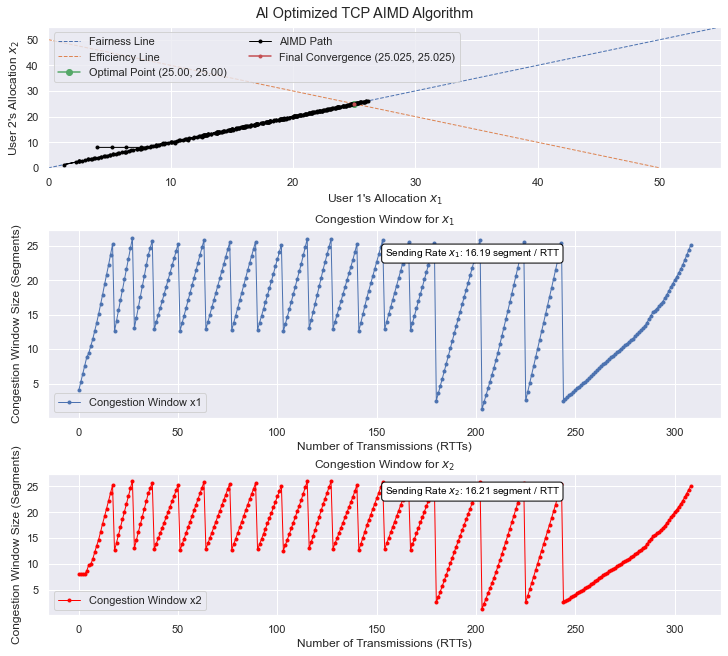

In [ ]:
# Run AI-Optimized AIMD Convergence Simulation
plot_ai_tuned_aimd_convergence(
    C=50,            # Total network capacity (maximum congestion window size)
    x1=4,            # Initial congestion window size for User 1
    x2=8,            # Initial congestion window size for User 2
    alpha1=1,        # Initial additive increase factor for User 1 (rate of growth per RTT)
    alpha2=1,        # Initial additive increase factor for User 2
    beta1=0.5,       # Initial multiplicative decrease factor for User 1 (rate of reduction upon congestion)
    beta2=0.5,       # Initial multiplicative decrease factor for User 2
    output="AIMD_AI.svg",  # Output filename for saving the generated plot
    title="AI Optimized TCP AIMD Algorithm"  # Title displayed on the visualization
)

# Analysing Eigenvalues & Eigenvector

## AIMD Approach

In [ ]:
import numpy as np

def create_transition_matrix(beta_values, alpha_values):
    """
    Constructs the transition matrix for congestion control.
    
    The transition matrix determines how congestion window sizes evolve based on
    additive increase (alpha) and multiplicative decrease (beta) values.
    
    Args:
        beta_values (numpy array): Matrix of multiplicative decrease factors (β).
        alpha_values (numpy array): Column vector of additive increase factors (α).
    
    Returns:
        numpy array: The computed transition matrix.
    """
    # Compute the scaling adjustment factor
    adjustment = 1 - beta_values
    
    # Create a diagonal matrix from the first row of beta values
    diagonal_betas = np.diag(beta_values[0])
    
    # Compute the weighted scaling factor based on alpha values
    scale_factor = (1 / np.sum(alpha_values)) * np.dot(alpha_values, adjustment)
    
    return diagonal_betas + scale_factor


def simulate_congestion_window_evolution(transition_matrix, initial_window_sizes, iterations=10):
    """
    Simulates the evolution of congestion window sizes over multiple iterations.

    Args:
        transition_matrix (numpy array): The transition matrix controlling state changes.
        initial_window_sizes (numpy array): Initial congestion window sizes.
        iterations (int): Number of steps to simulate.

    Returns:
        numpy array: The final congestion window sizes after applying transformations.
    """
    window_sizes = initial_window_sizes.copy()
    
    for _ in range(iterations):
        window_sizes = np.dot(transition_matrix, window_sizes)
        print(window_sizes)  # Display window sizes at each step
    
    return window_sizes


def compute_perron_frobenius_properties(matrix, tolerance=1e-6, max_iterations=1000):
    """
    Computes the dominant eigenvalue and eigenvector using the Perron-Frobenius theorem.
    
    This helps in analyzing fairness and convergence speed of congestion control.

    Args:
        matrix (numpy array): A non-negative square matrix.
        tolerance (float): Convergence threshold for eigenvalue computation.
        max_iterations (int): Maximum iterations for convergence.

    Returns:
        tuple: (dominant eigenvalue, normalized dominant eigenvector)
    """
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"
    
    num_nodes = matrix.shape[0]
    
    # Initialize a random probability vector
    eigenvector = np.random.rand(num_nodes)
    eigenvector /= np.sum(eigenvector)
    
    prev_eigenvalue = 0
    
    for _ in range(max_iterations):
        # Matrix-vector multiplication
        transformed_vector = np.dot(matrix, eigenvector)
        
        # Compute Rayleigh quotient (approximate eigenvalue)
        eigenvalue = np.dot(eigenvector, transformed_vector)
        
        # Normalize using infinity norm to prevent numerical instability
        eigenvector = transformed_vector / np.linalg.norm(transformed_vector, ord=np.inf)
        
        # Check for convergence
        if np.abs(eigenvalue - prev_eigenvalue) < tolerance:
            break
        
        prev_eigenvalue = eigenvalue
    
    # Normalize eigenvector to sum to 1
    return eigenvalue, eigenvector / np.sum(eigenvector)


# --- Main Execution ---

# Define AIMD parameters
beta_values = np.array([[0.5, 0.5, 0.5]])  # Multiplicative decrease factors (β)
alpha_values = np.array([[1], [1], [1]])   # Additive increase factors (α)
initial_window_sizes = np.array([[2], [5], [12]])  # Initial congestion window sizes

# Construct transition matrix
transition_matrix = create_transition_matrix(beta_values, alpha_values)

# Simulate congestion window evolution
final_window_sizes = simulate_congestion_window_evolution(transition_matrix, initial_window_sizes)

# Compute Perron-Frobenius properties (dominant eigenvalue & eigenvector)
dominant_eigenvalue, dominant_eigenvector = compute_perron_frobenius_properties(transition_matrix)

# Display results
print("Perron-Frobenius eigenvalue:", dominant_eigenvalue)
print("Perron-Frobenius eigenvector:", dominant_eigenvector)

[[4.16666667]
 [5.66666667]
 [9.16666667]]
[[5.25]
 [6.  ]
 [7.75]]
[[5.79166667]
 [6.16666667]
 [7.04166667]]
[[6.0625]
 [6.25  ]
 [6.6875]]
[[6.19791667]
 [6.29166667]
 [6.51041667]]
[[6.265625]
 [6.3125  ]
 [6.421875]]
[[6.29947917]
 [6.32291667]
 [6.37760417]]
[[6.31640625]
 [6.328125  ]
 [6.35546875]]
[[6.32486979]
 [6.33072917]
 [6.34440104]]
[[6.32910156]
 [6.33203125]
 [6.33886719]]
Perron-Frobenius eigenvalue: 2.9999991827372723
Perron-Frobenius eigenvector: [0.33333332 0.33333336 0.33333332]


## AAIMD Approach

In [ ]:
import numpy as np

def create_adaptive_aimd_transition_matrix(beta_values, alpha_values):
    """
    Constructs the transition matrix for Adaptive AIMD (AAIMD) using dynamically 
    adjusted additive increase (alpha) and multiplicative decrease (beta) factors.

    Args:
        beta_values (numpy array): Matrix of adaptive multiplicative decrease factors (β).
        alpha_values (numpy array): Column vector of adaptive additive increase factors (α).

    Returns:
        numpy array: The computed transition matrix for AAIMD.
    """
    # Compute adjustment factor based on beta values
    adjustment = 1 - beta_values

    # Create a diagonal matrix using the first row of beta values
    diagonal_betas = np.diag(beta_values[0])

    # Compute the scaling factor based on adaptive alpha values
    scale_factor = (1 / np.sum(alpha_values)) * np.dot(alpha_values, adjustment)

    return diagonal_betas + scale_factor


def simulate_adaptive_aimd_window_evolution(transition_matrix, initial_window_sizes, iterations=10):
    """
    Simulates the evolution of congestion window sizes under AAIMD for multiple iterations.

    Args:
        transition_matrix (numpy array): The transition matrix governing window updates.
        initial_window_sizes (numpy array): Initial congestion window sizes.
        iterations (int): Number of steps to simulate.

    Returns:
        numpy array: Final congestion window sizes after the transformation process.
    """
    window_sizes = initial_window_sizes.copy()

    for _ in range(iterations):
        window_sizes = np.dot(transition_matrix, window_sizes)
        print(window_sizes)  # Print window sizes at each step

    return window_sizes


def compute_perron_frobenius_properties(matrix, tolerance=1e-6, max_iterations=1000):
    """
    Computes the dominant eigenvalue and eigenvector of a given transition matrix 
    using the Perron-Frobenius theorem. This helps analyze fairness and convergence speed.

    Args:
        matrix (numpy array): A non-negative square matrix.
        tolerance (float): Convergence threshold for eigenvalue computation.
        max_iterations (int): Maximum iterations allowed for convergence.

    Returns:
        tuple: (dominant eigenvalue, normalized dominant eigenvector)
    """
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    num_nodes = matrix.shape[0]

    # Initialize a probability vector
    eigenvector = np.random.rand(num_nodes)
    eigenvector /= np.sum(eigenvector)

    prev_eigenvalue = 0

    for _ in range(max_iterations):
        # Compute matrix-vector multiplication
        transformed_vector = np.dot(matrix, eigenvector)

        # Compute Rayleigh quotient (approximate eigenvalue)
        eigenvalue = np.dot(eigenvector, transformed_vector)

        # Normalize using infinity norm to prevent instability
        eigenvector = transformed_vector / np.linalg.norm(transformed_vector, ord=np.inf)

        # Check for convergence
        if np.abs(eigenvalue - prev_eigenvalue) < tolerance:
            break

        prev_eigenvalue = eigenvalue

    # Normalize eigenvector to sum to 1
    return eigenvalue, eigenvector / np.sum(eigenvector)


# --- Main Execution ---

# Define adaptive AIMD parameters
beta_values = np.array([[0.5, 0.4, 0.3]])  # Adaptive multiplicative decrease factors (β)
alpha_values = np.array([[1], [1.2], [1.5]])  # Dynamic additive increase factors (α)
initial_window_sizes = np.array([[2], [5], [12]])  # Initial congestion window sizes

# Construct AAIMD transition matrix
adaptive_aimd_transition_matrix = create_adaptive_aimd_transition_matrix(beta_values, alpha_values)

# Simulate congestion window evolution under AAIMD
final_window_sizes = simulate_adaptive_aimd_window_evolution(adaptive_aimd_transition_matrix, initial_window_sizes)

# Compute Perron-Frobenius properties for AAIMD analysis
dominant_eigenvalue, dominant_eigenvector = compute_perron_frobenius_properties(adaptive_aimd_transition_matrix)

# Display results
print("Perron-Frobenius eigenvalue (AAIMD):", dominant_eigenvalue)
print("Perron-Frobenius eigenvector (AAIMD):", dominant_eigenvector)

[[4.35135135]
 [6.02162162]
 [8.62702703]]
[[5.37231556]
 [6.24461651]
 [7.38306793]]
[[5.82158352]
 [6.26035749]
 [6.91805899]]
[[6.02150731]
 [6.23700166]
 [6.74149103]]
[[6.11129376]
 [6.21544878]
 [6.67325746]]
[[6.15191617]
 [6.20170266]
 [6.64638117]]
[[6.17040308]
 [6.19401506]
 [6.63558185]]
[[6.17885502]
 [6.1899902 ]
 [6.63115478]]
[[6.18273291]
 [6.18796256]
 [6.62930453]]
[[6.18451704]
 [6.18696572]
 [6.62851724]]
Perron-Frobenius eigenvalue (AAIMD): 2.742221362939879
Perron-Frobenius eigenvector (AAIMD): [0.32558132 0.32558145 0.34883724]


## AFHISD Approach

In [ ]:
import numpy as np

def construct_afhisd_transition_matrix(beta_values, alpha_values):
    """
    Constructs the transition matrix for Adaptive Fairness Hybrid Increase Sigmoidal Decrease (AFHISD)
    using adaptive multiplicative decrease (beta) and fairness-aware sigmoidal increase (alpha) values.

    Args:
        beta_values (numpy array): Matrix of multiplicative decrease factors (β).
        alpha_values (numpy array): Column vector of fairness-aware sigmoidal increase factors (α).

    Returns:
        numpy array: The computed transition matrix for AFHISD.
    """
    # Compute adjustment factor based on beta values
    adjustment_factor = 1 - beta_values

    # Create a diagonal matrix using the first row of beta values
    diagonal_matrix = np.diag(beta_values[0])

    # Compute the scaling factor based on adaptive alpha values
    scale_factor = (1 / np.sum(alpha_values)) * np.dot(alpha_values, adjustment_factor)

    return diagonal_matrix + scale_factor


def simulate_afhisd_congestion_window(transition_matrix, initial_window_sizes, iterations=10):
    """
    Simulates the evolution of congestion window sizes under AFHISD for multiple iterations.

    Args:
        transition_matrix (numpy array): The transition matrix governing window updates.
        initial_window_sizes (numpy array): Initial congestion window sizes.
        iterations (int): Number of steps to simulate.

    Returns:
        numpy array: Final congestion window sizes after transformation.
    """
    window_sizes = initial_window_sizes.copy()

    for _ in range(iterations):
        window_sizes = np.dot(transition_matrix, window_sizes)
        print(window_sizes)  # Print window sizes at each step

    return window_sizes


def compute_perron_frobenius_eigen(matrix, tolerance=1e-6, max_iterations=1000):
    """
    Computes the dominant eigenvalue and eigenvector of a given transition matrix 
    using the Perron-Frobenius theorem. This helps analyze fairness, stability, and convergence speed.

    Args:
        matrix (numpy array): A non-negative square matrix.
        tolerance (float): Convergence threshold for eigenvalue computation.
        max_iterations (int): Maximum iterations allowed for convergence.

    Returns:
        tuple: (dominant eigenvalue, normalized dominant eigenvector)
    """
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    num_nodes = matrix.shape[0]

    # Initialize a probability vector
    eigenvector = np.random.rand(num_nodes)
    eigenvector /= np.sum(eigenvector)

    prev_eigenvalue = 0

    for _ in range(max_iterations):
        # Compute matrix-vector multiplication
        transformed_vector = np.dot(matrix, eigenvector)

        # Compute Rayleigh quotient (approximate eigenvalue)
        eigenvalue = np.dot(eigenvector, transformed_vector)

        # Normalize using infinity norm to prevent instability
        eigenvector = transformed_vector / np.linalg.norm(transformed_vector, ord=np.inf)

        # Check for convergence
        if np.abs(eigenvalue - prev_eigenvalue) < tolerance:
            break

        prev_eigenvalue = eigenvalue

    # Normalize eigenvector to sum to 1
    return eigenvalue, eigenvector / np.sum(eigenvector)


# --- Main Execution ---

# Define AFHISD parameters
beta_values = np.array([[0.3, 0.35, 0.4]])  # Adaptive multiplicative decrease factors (β)

# Compute fairness-aware sigmoidal increase factors (α)
alpha_values = 1 / (1 + np.exp(-np.array([[2], [5], [12]])))

# Initial congestion window sizes
initial_window_sizes = np.array([[2], [5], [12]])

# Construct AFHISD transition matrix
afhisd_transition_matrix = construct_afhisd_transition_matrix(beta_values, alpha_values)

# Simulate congestion window evolution under AFHISD
final_window_sizes = simulate_afhisd_congestion_window(afhisd_transition_matrix, initial_window_sizes)

# Compute Perron-Frobenius properties for AFHISD analysis
dominant_eigenvalue, dominant_eigenvector = compute_perron_frobenius_eigen(afhisd_transition_matrix)

# Display results
print("Perron-Frobenius eigenvalue for AFHISD:", dominant_eigenvalue)
print("Perron-Frobenius eigenvector for AFHISD:", dominant_eigenvector)

[[4.23155504]
 [5.84543773]
 [8.92300724]]
[[4.98236452]
 [6.23307438]
 [7.7845611 ]]
[[5.23655646]
 [6.40139416]
 [7.36204938]]
[[5.32318318]
 [6.47199975]
 [7.20481707]]
[[5.35290786]
 [6.50092567]
 [7.14616648]]
[[5.36317943]
 [6.51257689]
 [7.12424368]]
[[5.36675422]
 [6.51721115]
 [7.11603463]]
[[5.36800722]
 [6.51903677]
 [7.11295601]]
[[5.3684495 ]
 [6.51975059]
 [7.11179992]]
[[5.36860667]
 [6.52002804]
 [7.11136529]]
Perron-Frobenius eigenvalue for WISD: 2.4106995096396595
Perron-Frobenius eigenvector for WISD: [0.28256288 0.34316856 0.37426856]


## AI-Tuning Approach

In [ ]:
import numpy as np
import json
import openai


def ai_tune_congestion_params(c, x1, x2, x3, prev_alpha1, prev_alpha2, prev_alpha3, prev_beta1, prev_beta2, prev_beta3):
    """
    Uses AI to dynamically optimize congestion control parameters (α and β) to ensure fairness and efficiency.

    Args:
        c (int): Network capacity.
        x1, x2, x3 (float): Current congestion window sizes.
        prev_alpha1, prev_alpha2, prev_alpha3 (float): Previous additive increase factors.
        prev_beta1, prev_beta2, prev_beta3 (float): Previous multiplicative decrease factors.

    Returns:
        tuple: Updated AI-tuned (α1, α2, α3, β1, β2, β3) values.
    """

    prompt = f"""
    You are an AI assistant optimizing TCP congestion control parameters for fairness and efficiency.
    Your goal is to ensure that x1, x2, and x3 converge towards equal and maximized utilization of the TCP load.

    **STRICT RULES TO FOLLOW:**
    - Maintain the constraint: x1 + x2 + x3 ≈ {c} (must not exceed c).
    - Ensure fairness: Adjust x1, x2, and x3 so that they **always** move towards x1 ≈ x2 ≈ x3.
    - **x1 must NEVER decrease if x1 < max(x2, x3)**, **x2 must NEVER decrease if x2 < max(x1, x3)**, and **x3 must NEVER decrease if x3 < max(x1, x2)**.
    - Under no circumstances should any value move away from fairness.
    - Adjust α1, α2, α3 dynamically to enforce fairness.
    - Apply multiplicative decrease (β values) to prevent exceeding capacity.
    - Respond **only** with a valid JSON object containing updated congestion parameters.
    - **DO NOT EXPLAIN** or include extra text.

    **Current State:**
    {{
        "x1": {x1},
        "x2": {x2},
        "x3": {x3},
        "alpha1": {prev_alpha1},
        "alpha2": {prev_alpha2},
        "alpha3": {prev_alpha3},
        "beta1": {prev_beta1},
        "beta2": {prev_beta2},
        "beta3": {prev_beta3}
    }}

    **Expected JSON Response Format:**
    {{
        "alpha1": 0.12,
        "alpha2": 0.14,
        "alpha3": 0.13,
        "beta1": 0.45,
        "beta2": 0.48,
        "beta3": 0.50
    }}
    """

    try:
        response = openai.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a TCP congestion control optimization assistant."},
                {"role": "user", "content": prompt}
            ],
            model="gpt-4o",
        )

        # Extract JSON response
        response_text = response.choices[0].message.content.strip()
        cleaned_response = response_text.strip("```json").strip("```").strip()
        print("Cleaned response:", cleaned_response)
        params = json.loads(cleaned_response)

        return (
            float(params.get("alpha1", prev_alpha1)),
            float(params.get("alpha2", prev_alpha2)),
            float(params.get("alpha3", prev_alpha3)),
            float(params.get("beta1", prev_beta1)),
            float(params.get("beta2", prev_beta2)),
            float(params.get("beta3", prev_beta3)),
        )

    except (json.JSONDecodeError, KeyError, ValueError) as e:
        print("Error in AI response:", e)
        return prev_alpha1, prev_alpha2, prev_alpha3, prev_beta1, prev_beta2, prev_beta3  # Fallback values


# --- AI-Optimized Congestion Control Simulation ---

# Network capacity
C = 50

# Initial congestion window sizes
x1, x2, x3 = 2, 12, 5

# Initial additive increase factors
prev_alpha1, prev_alpha2, prev_alpha3 = 0.1, 0.1, 0.1

# Initial multiplicative decrease factors
prev_beta1, prev_beta2, prev_beta3 = 0.3, 0.3, 0.3

# Number of iterations for AI tuning
iterations = 100

# Data storage for analysis
window_sizes = np.zeros((iterations, 3))  # Stores window sizes per iteration
ai_parameters = np.zeros((iterations, 6))  # Stores AI-tuned parameters (α1, α2, α3, β1, β2, β3)

for i in range(iterations):
    # AI dynamically adjusts AIMD parameters for fairness & stability
    alpha1, alpha2, alpha3, beta1, beta2, beta3 = ai_tune_congestion_params(
        C, x1, x2, x3, prev_alpha1, prev_alpha2, prev_alpha3, prev_beta1, prev_beta2, prev_beta3
    )

    # Store AI-tuned parameters for later analysis
    ai_parameters[i] = [alpha1, alpha2, alpha3, beta1, beta2, beta3]
    window_sizes[i] = [x1, x2, x3]

    # Apply AI-tuned congestion control logic
    if x1 + x2 + x3 <= C:
        x1 += alpha1 * x1
        x2 += alpha2 * x2
        x3 += alpha3 * x3
    else:
        x1 *= (1 - beta1)
        x2 *= (1 - beta2)
        x3 *= (1 - beta3)

    # Update previous parameters for next AI adjustment
    prev_alpha1, prev_alpha2, prev_alpha3 = alpha1, alpha2, alpha3
    prev_beta1, prev_beta2, prev_beta3 = beta1, beta2, beta3

print("Final AI-optimized congestion window sizes:", window_sizes[-1])


# --- Perron-Frobenius Eigenvector Computation ---

def compute_perron_frobenius_eigen(matrix):
    """
    Computes the Perron-Frobenius right eigenvector of a non-negative square matrix.

    Args:
        matrix (numpy.ndarray): Non-negative square matrix.

    Returns:
        numpy.ndarray: Normalized dominant eigenvector.
    """
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    dominant_index = np.argmax(np.real(eigenvalues))
    eigenvector = np.real(eigenvectors[:, dominant_index])
    eigenvector /= np.sum(eigenvector)

    return eigenvector


# Construct AI Transition Matrix for 3 Users
AI_A = np.array([
    [beta1, (1 - beta1) / 3, (1 - beta1) / 3],
    [(1 - beta2) / 3, beta2, (1 - beta2) / 3],
    [(1 - beta3) / 3, (1 - beta3) / 3, beta3]
])

# Compute Perron-Frobenius Right Eigenvector for AI-Optimized Congestion Control
pf_eigenvector = compute_perron_frobenius_eigen(AI_A)
print("Perron-Frobenius right eigenvector for AI-Optimized:", pf_eigenvector)


# --- Perron-Frobenius Eigenvalue & Eigenvector via Power Iteration ---

def compute_perron_frobenius(matrix, tol=1e-6, max_iter=1000):
    """
    Computes the Perron-Frobenius eigenvalue and eigenvector using power iteration.

    Args:
        matrix (numpy.ndarray): Non-negative square matrix.
        tol (float): Convergence threshold.
        max_iter (int): Maximum number of iterations.

    Returns:
        tuple: (Perron-Frobenius eigenvalue, normalized eigenvector)
    """
    assert np.all(matrix >= 0), "Matrix must be non-negative"
    assert matrix.shape[0] == matrix.shape[1], "Matrix must be square"

    n = len(matrix)
    v = np.random.rand(n)
    v /= np.sum(v)

    prev_eigenvalue = 0
    for _ in range(max_iter):
        Av = np.dot(matrix, v)
        eigenvalue = np.dot(v, Av)
        v = Av / np.linalg.norm(Av, ord=np.inf)
        if np.abs(eigenvalue - prev_eigenvalue) < tol:
            break
        prev_eigenvalue = eigenvalue

    return eigenvalue, v / np.sum(v)


# Compute Perron-Frobenius Eigenvalue & Eigenvector
pf_eigenvalue, pf_eigenvector = compute_perron_frobenius(AI_A)
print("Perron-Frobenius eigenvalue for AI:", pf_eigenvalue)
print("Perron-Frobenius eigenvector for AI:", pf_eigenvector)


Cleaned response:  {
    "alpha1": 0.15,
    "alpha2": 0.05,
    "alpha3": 0.12,
    "beta1": 0.3,
    "beta2": 0.5,
    "beta3": 0.4
}
Cleaned response:  {
    "alpha1": 0.2,
    "alpha2": 0.03,
    "alpha3": 0.1,
    "beta1": 0.3,
    "beta2": 0.5,
    "beta3": 0.4
}
Cleaned response:  {
    "alpha1": 0.2,
    "alpha2": 0.01,
    "alpha3": 0.1,
    "beta1": 0.4,
    "beta2": 0.5,
    "beta3": 0.5
}
Cleaned response:  {
    "alpha1": 0.2,
    "alpha2": 0.01,
    "alpha3": 0.15,
    "beta1": 0.4,
    "beta2": 0.5,
    "beta3": 0.5
}
Cleaned response:  {
    "alpha1": 0.2,
    "alpha2": 0.01,
    "alpha3": 0.15,
    "beta1": 0.4,
    "beta2": 0.5,
    "beta3": 0.5
}
Cleaned response:  {
    "alpha1": 0.25,
    "alpha2": 0.01,
    "alpha3": 0.17,
    "beta1": 0.4,
    "beta2": 0.5,
    "beta3": 0.5
}
Cleaned response:  {
    "alpha1": 0.25,
    "alpha2": 0.12,
    "alpha3": 0.18,
    "beta1": 0.4,
    "beta2": 0.5,
    "beta3": 0.5
}
Cleaned response:  {
    "alpha1": 0.25,
    "alpha2":